In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from ipywidgets import interact

In [19]:
url = ("https://raw.githubusercontent.com/"
       "ipython-books/cookbook-2nd-data/"
       "master/bikes.csv")

In [20]:
df = pd.read_csv(url, index_col='Date',parse_dates=True, dayfirst=True)

In [21]:
df.head(4)

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0
2013-01-02,00:00,69,0,13,0,18,0,2,0
2013-01-03,00:00,69,2,21,6,22,1,0,0
2013-01-04,00:00,80,0,22,4,16,0,125,0


In [22]:
df.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


<Axes: xlabel='Date'>

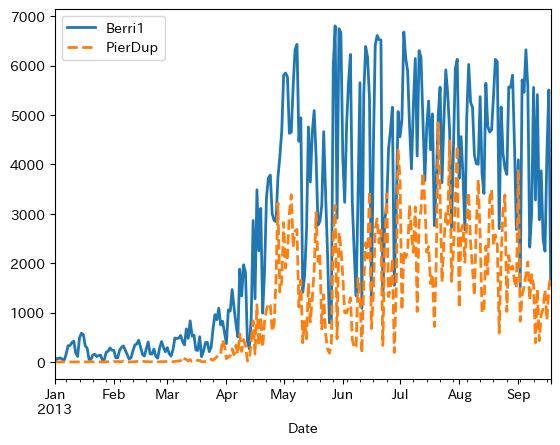

In [23]:
df[["Berri1","PierDup"]].plot(style=["-","--"],lw=2)

In [24]:
df.index.weekday

Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       ...
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2],
      dtype='int32', name='Date', length=261)

In [25]:
#df.index.weekday_name

In [26]:
df.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object', name='Date', length=261)

In [27]:
df_week = df.groupby(df.index.weekday).sum()

In [28]:
df_week

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,,
0,00:0000:0000:0000:0000:0000:0000:0000:0000:000...,106826,51646,68087,129982,69767,44500,119211,72883
1,00:0000:0000:0000:0000:0000:0000:0000:0000:000...,117244,54656,76974,141217,74299,40679,123533,76559
2,00:0000:0000:0000:0000:0000:0000:0000:0000:000...,120434,59604,79033,145860,80437,42564,125173,79501
3,00:0000:0000:0000:0000:0000:0000:0000:0000:000...,115193,52340,76273,141424,73668,36349,120684,74540
4,00:0000:0000:0000:0000:0000:0000:0000:0000:000...,105701,44252,71605,127526,64385,36850,118556,71426
5,00:0000:0000:0000:0000:0000:0000:0000:0000:000...,75754,27226,45947,79743,35544,46149,97143,56438
6,00:0000:0000:0000:0000:0000:0000:0000:0000:000...,74873,29181,40812,75746,37620,53812,100735,53798


C:\Users\kijuh\AppData\Local\Temp\ipykernel_4144\945729305.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


(0.0, 151791.7)

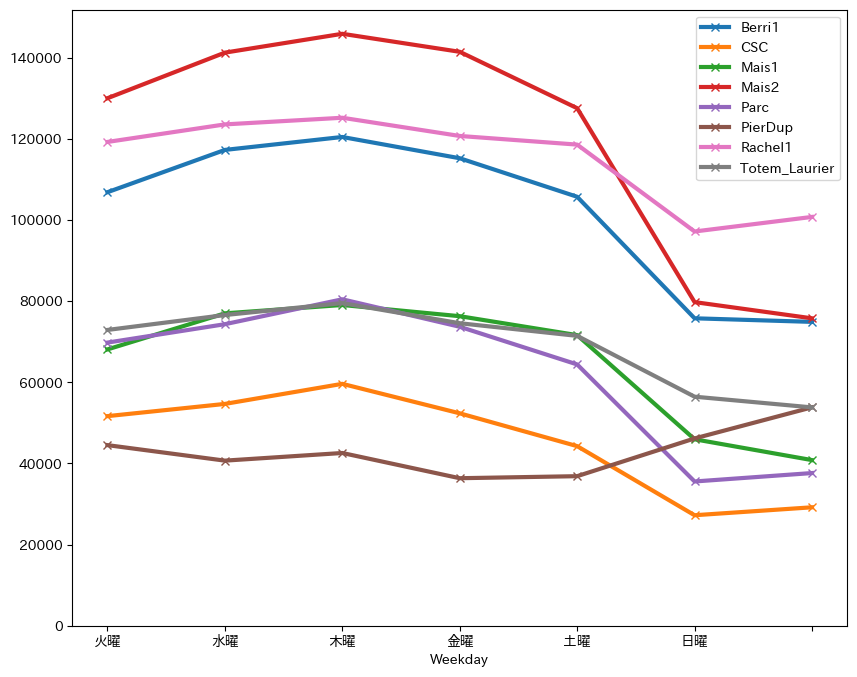

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_week.plot(style='-x', lw=3, ax=ax)
ax.set_xlabel('Weekday')

ax.set_xticklabels(
    ('月曜,火曜,水曜,木曜,'
     '金曜,土曜,日曜').split(','))
ax.set_ylim(0)  

In [30]:
@interact
def plot_interact(n=(1,20)): # ← スライダーを作成。
    fig,ax = plt.subplots(1,1,figsize=(4,5))
    df['Berri1'].rolling(window=n).mean().plot(ax=ax) # .rolling(window=n).mean()	移動平均	
    ax.set_ylim(0, 7000)
    plt.show()

interactive(children=(IntSlider(value=10, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

ValueError: window must be an integer 0 or greater